# Домашняя работа 10 (?? баллов). Предсказание победителя в Dota2.

В этом финальном домашнем задании вы будет работать над более-менее реальными данными - сведениями из онлайн игры dota2. Примените все знания, которые вы полусили за этот семестр. Попробуйте сгенерировать разные признаки.

По факту это перове соревнование в ML, в коттором мы предлагаем вам поучаствовать.

Изначально это задание было в курсе "Введение в машинное обучение" от ВШЭ.

## Задание

1. Скачайте данные отсюда: https://inclass.kaggle.com/c/dota-2-win-probability-prediction (потребуется регистрация на kaggle) или из папки `data/dota2`.
2. Прочитайте задание в файле `final-statement.ipynb`. Мы его не меняли и оставили таким, каким оно было в оригинальном курсе "Введение в машинное обучение".
3. Проведите всё исследование в одном jupyter ноутбуке.
4. Отправьте результат вашего предсказания на тестовой выборке на kaggle и в почте укажите что у вас получилось.
5. Сохраниет решение в github и отправьте ссылку на ноутбук на почту с темой `ML Homework #9: Name Surname`
6. Потом вы получите на проверку ноутбук сокурсника и задание на проверку. Вам нужно будет проверить всё и оформить отчет, отправив его в виде текста на почту в ответ на письмо с заданием.


**Дедлайны**

Поставим первый дедлайн на решение до `07.01.2018`, второй - на проверку, до `15.01.2018`. Мы бы были рады увидеть первые решения еще в этому году.

In [192]:
import pandas as pd
features = pd.read_csv('data/features.csv.zip', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [23]:
X = features.copy()
X.drop(features.columns[-6:len(features.columns)], axis=1, inplace=True)
X.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [60]:
print('Признаки, имеющие пропуски:')
Xcount = X.count()
print(Xcount[Xcount<Xcount.max()])
print('Максимальное число пропусков ', Xcount.max()-Xcount.min(), ' у признака ', Xcount.argmin())

Признаки, имеющие пропуски:
first_blood_time               77677
first_blood_team               77677
first_blood_player1            77677
first_blood_player2            53243
radiant_bottle_time            81539
radiant_courier_time           96538
radiant_flying_courier_time    69751
radiant_first_ward_time        95394
dire_bottle_time               81087
dire_courier_time              96554
dire_flying_courier_time       71132
dire_first_ward_time           95404
dtype: int64
Максимальное число пропусков  43987  у признака  first_blood_player2


Наблюдаются две группы признаков, имеющих пропущенные значения:
1. Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное (nan) значение. Если же событие произошло, но к нему причастен был только один игрок, тогда только признак first_blood_player2 будет nan, поэтому наибольшее число пропусков именно у этого признака.
2. Признаки приобретений преметов для каждой команды (префиксы radiant_ и dire_). Если за первые 5 минут команда не успела приобрести соответствующий предмет (bottle, courier, flying_courier) или установить первого наблюдателя (first_ward), то признаки принимают пропущенное значение.
С другой стороны, эти признаки можно разбить на группы по-другому:
1. Категориальные признаки события "первая кровь", принимающие значения 0,1(first_blood_team) или 0,1,...,9 (first_blood_player). В этом случае, заменяя пропущенные значения нулями, мы искусственно увеличиваем вероятность возникновения событитя "первой крови" до 1, при этом возрастает доля "совершения первой крови" командой Radiant. Во втором случае, заменяя пропущенные значения нулями, мы также увеличиваем вероятность причастности к событию "первой крови" нулевого игрока, кроме того, возникает иллюзия "раздвоения" нулевого игрока, поскольку к событию он будет причастен и как player1 и как player2. Лучше пропуски этих признаков заменить аномальными (для игры) зачениями, например, -1. Аномальные значения предпочтительнее нулей в моделях с деревьями - так объекты с пропусками скорее окажутся в отдельной ветви дерева.
2. ВременнЫе признаки события "первая кровь" и приобретений предметов. Здесь нулевые значения вместо пропусков тоже не желательны, поскольку это будет означать возникновение события в момент отсчета игрового времени, что не соответствует действительности. Логичнее поставить вместо пропуска очень большое значение, на порядок превышающее максимальное время.

In [166]:
X_ = X.copy()
categor = ['first_blood_team', 'first_blood_player1', 'first_blood_player2']
for col in categor: X_[col] = X_[col].fillna(value = -1)
timer = ['first_blood_time', 
         'radiant_bottle_time', 'radiant_courier_time', 'radiant_flying_courier_time', 'radiant_first_ward_time',
         'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time', 'dire_first_ward_time']
for col in timer: X_[col] = X_[col].fillna(value = 3000.)

In [421]:
X_.count().unique()

array([97230], dtype=int64)

In [167]:
y = features.radiant_win
print('Целевой признак ', y.name,' не имеет пропусков. Count(',y.name,') = ', y.count())

Целевой признак  radiant_win  Count( radiant_win ) =  97230


Распределение целевого признака почти равномерное:


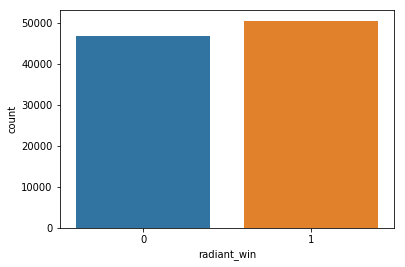

In [168]:
import seaborn as sns
sns.countplot(x=y.name, data=features);
print('Распределение целевого признака почти равномерное:')

In [68]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Градиентный бустинг

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=30, max_depth = 5, random_state=42, learning_rate = 0.5) 

In [154]:
import time
import datetime

start_time = datetime.datetime.now()

scores_gb = cross_val_score(gb, X_, y, cv=kfold, scoring='roc_auc', n_jobs=-1)
print("Roc_auc GradientBoostingClassifier: {}".format(scores_gb.mean()))
print("StdRoc_auc GradientBoostingClassifier: {}".format(scores_gb.std()))

print('Time elapsed:', datetime.datetime.now() - start_time)

Roc_auc GradientBoostingClassifier: 0.7000243044048571
StdRoc_auc GradientBoostingClassifier: 0.001391358708246689
Time elapsed: 0:19:26.039543


In [155]:
trees = [10,20,30,40,50,60,70]
scores_gbc = []
for i in trees:
    gbc = GradientBoostingClassifier(n_estimators=i, max_depth = 5, random_state=42, learning_rate = 0.5) 
    scores_gbc.append(cross_val_score(gbc, X_, y, cv=kfold, scoring='roc_auc').mean())
    print("Roc_auc GradientBoostingClassifier with number trees {0}: {1}".format(i, scores_gbc[-1]))

Roc_auc GradientBoostingClassifier with number trees 10: 0.6911306540097735
Roc_auc GradientBoostingClassifier with number trees 20: 0.698133656781053
Roc_auc GradientBoostingClassifier with number trees 30: 0.7000243044048571
Roc_auc GradientBoostingClassifier with number trees 40: 0.7012704861011894
Roc_auc GradientBoostingClassifier with number trees 50: 0.7014140009947722
Roc_auc GradientBoostingClassifier with number trees 60: 0.7013266243344887
Roc_auc GradientBoostingClassifier with number trees 70: 0.7002401220204018


1. Среднее качество при замене пропусков нулями (отличие от качества при ненулевых заменах крайне мало - можно было просто заменить все пропуски нулями!):
Roc_auc GradientBoostingClassifier with number trees 10: 0.6918103100449864
Roc_auc GradientBoostingClassifier with number trees 20: 0.6987400022236679
Roc_auc GradientBoostingClassifier with number trees 30: 0.7007904048004996
Roc_auc GradientBoostingClassifier with number trees 40: 0.7013268763830961
Roc_auc GradientBoostingClassifier with number trees 50: 0.7008167201265445
Roc_auc GradientBoostingClassifier with number trees 75: 0.6998675147198005

Cамое хорошее качество 0.7014140009947722 получается при 50 деревьях


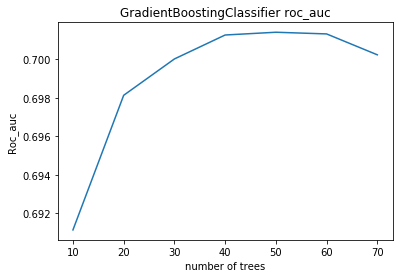

In [158]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(trees, scores_gbc)

plt.title('GradientBoostingClassifier roc_auc')
plt.xlabel('number of trees')
plt.ylabel('Roc_auc')

print('Cамое хорошее качество {0} получается при {1} деревьях'.format(np.max(scores_gbc), trees[np.argmax(scores_gbc)]))

Учитывая временнЫе затраты и мизерный прирост качества, смысла использовать больше 30 деревьев в градиентном бустинге не вижу. Для ускорения обучения при увеличении количества деревьев можно попробовать уменьшить выборку объектов обучения, уменьшить число признаков в наборе, уменьшить глубину деревьев max_depth или скорость обучения learning_rate.

In [169]:
gb.fit(X_,y)
pred = gb.predict_proba(X_)[:, 1]
pred

array([ 0.46952703,  0.2474594 ,  0.74024257, ...,  0.40988707,
        0.56520892,  0.7576901 ])

In [191]:
print('Качество предсказания на выбранной модели с 30 деревьями для тренировочной выборки:')
y_pred = y-pred
len(y_pred[abs(y_pred)<0.5])/len(y_pred)

Качество предсказания на выбранной модели с 30 деревьями для тренировочной выборки:


0.6922760464877096

In [193]:
X_test = pd.read_csv('data/features_test.csv.zip', index_col='match_id')
X_test.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
6,1430287923,0,93,4,1103,1089,8,0,1,9,...,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
7,1430293357,1,20,2,556,570,1,0,0,9,...,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
10,1430301774,1,112,2,751,808,1,0,0,13,...,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
13,1430323933,1,27,3,708,903,1,1,1,11,...,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
16,1430331112,1,39,4,1259,661,4,0,0,9,...,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0


In [423]:
for col in categor: X_test[col] = X_test[col].fillna(value = -1)
for col in timer: X_test[col] = X_test[col].fillna(value = 3000.)

In [424]:
X_test.count().unique()

array([17177], dtype=int64)

In [425]:
print('Предсказания для тестовой выборки:')
pred_test = gb.predict_proba(X_test)[:, 1]
pred_test

Предсказания для тестовой выборки:


array([ 0.43837267,  0.77941031,  0.36387552, ...,  0.15089612,
        0.43763095,  0.54447746])

In [426]:
import numpy as np
df = pd.DataFrame({"match_id":np.array(X_test.index), "radiant_win":np.array(pred_test)})
df.to_csv('data/final.csv', sep=',', index=False)

# Логистическая регрессия. Пропущенные значения заменены нулями

In [490]:
X_ = X.copy()
X_ = X_.fillna(value = 0.0)
X_.count().unique()

array([97230], dtype=int64)

In [203]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(penalty = 'l2', random_state = 42)

In [491]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_sc = scaler.fit(X_).transform(X_)

start_time = datetime.datetime.now()

scores_sc = cross_val_score(lreg, X_sc, y, cv=kfold, scoring='roc_auc')
print("Roc_auc LogisticRegression with StandartScaler: {}".format(scores_sc.mean()))
print("StdRoc_auc LogisticRegression with StandartScaler: {}".format(scores_sc.std()))

print('Time elapsed:', datetime.datetime.now() - start_time)

Roc_auc LogisticRegression with StandartScaler: 0.7165226003626438
StdRoc_auc LogisticRegression with StandartScaler: 0.001234836035915414
Time elapsed: 0:01:35.007259


In [231]:
Cf = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]
def Search(x, cf):
    scores_lr = []
    for i in cf:
        lr = LogisticRegression(penalty = 'l2', C=i, random_state = 42) 
        scores_lr.append(cross_val_score(lr, x, y, cv=kfold, scoring='roc_auc').mean())
        print("Roc_auc LogisticRegression with StandartScaler for C {0}: {1}".format(i, scores_lr[-1]))
    return scores_lr

In [492]:
scores_lreg = Search(X_sc, Cf)

Roc_auc LogisticRegression with StandartScaler for C 0.01: 0.7165502697259141
Roc_auc LogisticRegression with StandartScaler for C 0.05: 0.7165310804483765
Roc_auc LogisticRegression with StandartScaler for C 0.1: 0.7165271486657933
Roc_auc LogisticRegression with StandartScaler for C 0.15: 0.7165250323189964
Roc_auc LogisticRegression with StandartScaler for C 0.2: 0.7165236976938535
Roc_auc LogisticRegression with StandartScaler for C 0.5: 0.7165229965268772
Roc_auc LogisticRegression with StandartScaler for C 0.75: 0.7165229520660226
Roc_auc LogisticRegression with StandartScaler for C 1.0: 0.7165226003626438
Roc_auc LogisticRegression with StandartScaler for C 1.5: 0.7165224541307369
Roc_auc LogisticRegression with StandartScaler for C 2.0: 0.7165224350693109


In [497]:
def Plot(cf, scores):
    plt.plot(cf, scores)

    plt.title('LogisticRegression')
    plt.xlabel('C')
    plt.ylabel('scores_Roc_auc')

    print('Cамое хорошее качество {0} получается при C={1}'.format(np.max(scores), cf[np.argmax(scores)]))

Cамое хорошее качество 0.7165502697259141 получается при C=0.01


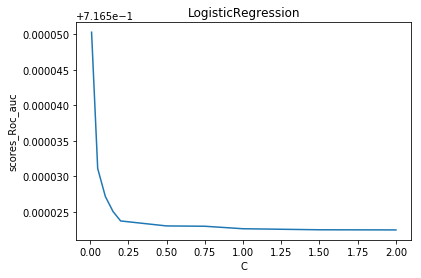

In [498]:
Plot(Cf, scores_lreg)

Качество логистической регресси в сравнении с градиентным бустингом на 1.5% лучше. Возможно причина в предварительной обработке признаков или в недостаточно тщательной настройке параметров модели градиентного бустинга.
Логистическая регрессия работает значительно быстрее, чем градиентный бустинг.

Исключим категориальные признаки

In [494]:
cat = ['lobby_type','r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero','d4_hero','d5_hero']
X_drop = X_.copy()
X_drop.drop(cat, axis=1, inplace=True)

In [495]:
X_drop.head()

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,5,2098,1489,20,0,0,7,3,842,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,4,1188,1033,9,0,1,12,4,1596,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,4,1319,1270,22,0,0,12,3,1314,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,4,1779,1056,14,0,0,5,2,539,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,4,1431,1090,8,1,0,8,2,629,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [496]:
scores_drop= Search(scaler.fit(X_drop).transform(X_drop), Cf)

Roc_auc LogisticRegression with StandartScaler for C 0.01: 0.7165593885630225
Roc_auc LogisticRegression with StandartScaler for C 0.05: 0.7165378016096108
Roc_auc LogisticRegression with StandartScaler for C 0.1: 0.7165342403465319
Roc_auc LogisticRegression with StandartScaler for C 0.15: 0.7165332298743302
Roc_auc LogisticRegression with StandartScaler for C 0.2: 0.7165327700760306
Roc_auc LogisticRegression with StandartScaler for C 0.5: 0.7165311811587577
Roc_auc LogisticRegression with StandartScaler for C 0.75: 0.7165306367370184
Roc_auc LogisticRegression with StandartScaler for C 1.0: 0.7165303634514961
Roc_auc LogisticRegression with StandartScaler for C 1.5: 0.7165301007421936
Roc_auc LogisticRegression with StandartScaler for C 2.0: 0.7165300795489056


Cамое хорошее качество 0.7165593885630225 получается при C=0.01


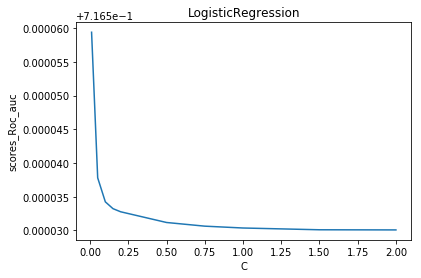

In [499]:
Plot(Cf, scores_drop)

In [502]:
(scores_drop[0]-scores_lreg[0])*100

0.00091188371084127695

На "урезанной" выборке признаков качество улучшилось менее чем на 0.001%. Изменение несущественно. Категориальные признаки, используемые как числовые, никак не улучшают качество модели, их смело можно выбрасывать при логистической регрессии, а лучше преобразовывать в dammy-признаки.

In [459]:
def Set_unique(x):
    set_u = set.union(set(x.r1_hero),set(x.r2_hero),set(x.r3_hero),set(x.r4_hero),set(x.r5_hero),
                      set(x.d1_hero),set(x.d2_hero),set(x.d3_hero),set(x.d4_hero),set(x.d5_hero))
    return set_u

In [503]:
set_uniq = Set_unique(X_)
print('В данной тренировочной выборке игры существует ', len(set_uniq), ' различных идентификаторов героев')

В данной тренировочной выборке игры существует  108  различных идентификаторов героев


In [411]:
def Pick(x):
    N = 112#len(set_uniq)
    x_pick = np.zeros((x.shape[0], N))

    for i, match_id in enumerate(x.index):
        for p in range(5):
            x_pick[i, x.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
            x_pick[i, x.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
    return x_pick

In [504]:
X_pick = Pick(X_)

In [398]:
def Merge(x, x_pick, set_u):
    df = pd.DataFrame(data = x_pick, columns = list(range(1,113)), index = x.index)
    df.drop(set_u^set(range(1,113)), axis=1, inplace=True)
    x_res = x.merge(df, left_index=True, right_index=True)
    return x_res

In [505]:
X_res = Merge(X_drop, X_pick,set_uniq)

In [506]:
scores_res = Search(scaler.fit(X_res).transform(X_res), Cf)

Roc_auc LogisticRegression with StandartScaler for C 0.01: 0.7519640431617559
Roc_auc LogisticRegression with StandartScaler for C 0.05: 0.7519362752510144
Roc_auc LogisticRegression with StandartScaler for C 0.1: 0.7519300322603206
Roc_auc LogisticRegression with StandartScaler for C 0.15: 0.7519280726567198
Roc_auc LogisticRegression with StandartScaler for C 0.2: 0.7519271680411408
Roc_auc LogisticRegression with StandartScaler for C 0.5: 0.7519257487038327
Roc_auc LogisticRegression with StandartScaler for C 0.75: 0.7519254733092755
Roc_auc LogisticRegression with StandartScaler for C 1.0: 0.7519251110734133
Roc_auc LogisticRegression with StandartScaler for C 1.5: 0.7519250072703489
Roc_auc LogisticRegression with StandartScaler for C 2.0: 0.7519248420212387


Cамое хорошее качество 0.7519640431617559 получается при C=0.01


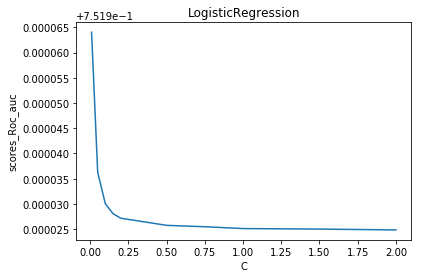

In [507]:
Plot(Cf, scores_res)

In [508]:
(scores_res[0]-scores_drop[0])*100

3.5404654598733432

Улучшение качества, по сравнению с "урезанными" признаками, около 3.5%. Это можно объяснить тем, что во множество признаков вернули правильно представленные довольно важные характеристики, ведь "победный" потенциал команды определяется возможностями каждого героя, другое дело как эти возможности реализует конкретный игрок команды.

In [509]:
X_res_sc = scaler.fit(X_res).transform(X_res)

In [510]:
lr = LogisticRegression(penalty = 'l2', C=0.01, random_state = 42) 
lr.fit(X_res_sc, y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [511]:
pred_lr = lr.predict_proba(X_res_sc)[:, 1]
pred_lr

array([ 0.66456478,  0.73367469,  0.60283404, ...,  0.46086568,
        0.41567468,  0.93287102])

In [512]:
print('Качество предсказания на выбранной модели при С=0.01 для тренировочной выборки:')
y_pred_lr = y-pred_lr
len(y_pred_lr[abs(y_pred_lr)<0.5])/len(y_pred_lr)

Качество предсказания на выбранной модели при С=0.01 для тренировочной выборки:


0.6849840584181837

In [513]:
(scores_res[0]-scores_gbc[0])*100

6.0833389151982438

Лучшая из рассмотренных моделей - логистическая регрессия с коэффициентом С=0.01 на расширенном наборе признаков. Улучшение качества по сравнению с градиентным бустингом 6%.

In [514]:
X_test_drop = X_test.copy()
X_test_drop.drop(cat, axis=1, inplace=True)

In [515]:
set_uniq_test = Set_unique(X_test)
print('В данной тестовой выборке игры существует ', len(set_uniq_test), ' различных идентификаторов героев')

В данной тестовой выборке игры существует  108  различных идентификаторов героев


In [516]:
len(set_uniq^set_uniq_test)

0

В данной игре существует 108 различный идентификаторов героев (из 112)

In [517]:
X_test_pick = Pick(X_test)

In [518]:
X_res_test = Merge(X_test_drop, X_test_pick, set_uniq_test)

In [519]:
X_test_sc = scaler.fit(X_res_test).transform(X_res_test)

In [520]:
print('Предсказания для тестовой выборки:')
pred_test_lr = lr.predict_proba(X_test_sc)[:, 1]
print('min прогноза: ',pred_test_lr.min(), ' \nmax прогноза: ', pred_test_lr.max())
pred_test_lr

Предсказания для тестовой выборки:
min прогноза:  0.00692601045373  
max прогноза:  0.996016737918


array([ 0.83165457,  0.72221189,  0.20634541, ...,  0.2377791 ,
        0.66079144,  0.42966207])

In [521]:
df = pd.DataFrame({"match_id":np.array(X_test.index), "radiant_win":np.array(pred_test_lr)})
df.to_csv('data/final_lr.csv', sep=',', index=False)

Правильность предсказания на тестовом наборе 0.75384 (kaggle.com)